In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

# PCA 

In [5]:
df = pd.read_csv('../data/oden_db/combined.csv')
df.head()

,y/delta,y^+,U,dU/dy,W,P,nx,ny,nz,Lx,...,u'p',v'p',w'p',u'u',v'v',w'w',u'v',u'w',v'w',k
0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,10240,1536,7680,25.132741,...,5.516144e-17,0.000000,3.628963e-19,4.176503e-36,0.000000e+00,-4.685007e-10,0.000000e+00,-6.964740e-40,0.000000e+00,-2.342503e-10
1,0.000014,0.071102,0.071102,0.999986,-0.000011,-4.717272e-09,10240,1536,7680,25.132741,...,1.083624e-02,-0.000068,2.394259e-05,1.005730e-03,4.711429e-09,4.434640e-04,-3.980482e-07,-8.647142e-08,6.027252e-11,7.245992e-04
2,0.000042,0.216250,0.216244,0.999947,-0.000034,-3.851045e-07,10240,1536,7680,25.132741,...,3.279666e-02,-0.000603,7.283457e-05,9.271135e-03,3.846287e-07,3.959369e-03,-1.137182e-05,-8.119895e-07,1.722111e-09,6.615444e-03
3,0.000085,0.438384,0.438355,0.999819,-0.000069,-6.055743e-06,10240,1536,7680,25.132741,...,6.567256e-02,-0.002330,1.477124e-04,3.792464e-02,6.048292e-06,1.542633e-02,-9.679785e-05,-3.408324e-06,1.466385e-08,2.667851e-02
4,0.000143,0.740447,0.740306,0.999379,-0.000117,-4.477271e-05,10240,1536,7680,25.132741,...,1.082096e-01,-0.006121,2.496946e-04,1.075992e-01,4.471796e-05,4.099240e-02,-4.781457e-04,-9.973361e-06,7.246230e-08,7.431814e-02


,y/delta,y^+,U,dU/dy,W,P,nx,ny,nz,Lx,...,u'p',v'p',w'p',u'u',v'v',w'w',u'v',u'w',v'w',k
y/delta,1.000000,0.589409,0.644834,-0.470960,-0.155028,0.008473,0.017974,0.028014,0.027722,-0.014874,...,-0.592903,0.654486,0.039027,-0.446143,-0.008836,-0.419802,0.291047,-0.199885,-0.182763,-0.421416
y^+,0.589409,1.000000,0.663848,-0.303539,0.071782,0.136178,0.430472,0.630684,0.632327,-0.261444,...,-0.334711,0.399022,0.294243,-0.485656,-0.138597,-0.410454,0.425775,-0.082646,-0.548634,-0.464660
U,0.644834,0.663848,1.000000,-0.872657,-0.033804,-0.462174,0.335848,0.542375,0.529201,-0.310360,...,0.000364,0.033846,0.070770,-0.205967,0.460463,0.049122,-0.124697,0.048586,-0.450082,-0.082780
dU/dy,-0.470960,-0.303539,-0.872657,1.000000,0.078004,0.732367,-0.189152,-0.296418,-0.288035,0.183609,...,-0.313015,0.263275,-0.051939,-0.142107,-0.731823,-0.438780,0.510902,-0.128958,0.216269,-0.292853
W,-0.155028,0.071782,-0.033804,0.078004,1.000000,0.068232,-0.014834,0.106272,0.095162,-0.126327,...,0.112189,-0.089367,-0.332191,0.081304,-0.069183,0.025724,0.010712,0.251357,-0.345594,0.056733
P,0.008473,0.136178,-0.462174,0.732367,0.068232,1.000000,-0.239550,-0.174391,-0.193670,-0.043414,...,-0.558565,0.598197,0.015336,-0.433771,-0.999992,-0.781026,0.883171,-0.256373,0.039012,-0.616190
nx,0.017974,0.430472,0.335848,-0.189152,-0.014834,-0.239550,1.000000,0.645364,0.701398,0.267569,...,0.150897,-0.222016,0.181157,0.117731,0.237434,0.190425,-0.127998,-0.049932,-0.339031,0.158232
ny,0.028014,0.630684,0.542375,-0.296418,0.106272,-0.174391,0.645364,1.000000,0.992876,-0.461680,...,0.141595,-0.163938,0.284603,-0.185344,0.171453,0.033165,0.054914,0.086379,-0.506246,-0.107381
nz,0.027722,0.632327,0.529201,-0.288035,0.095162,-0.193670,0.701398,0.992876,1.000000,-0.399892,...,0.148268,-0.181155,0.276785,-0.137605,0.190669,0.063278,0.023887,0.102761,-0.505167,-0.063260
Lx,-0.014874,-0.261444,-0.310360,0.183609,-0.126327,-0.043414,0.267569,-0.461680,-0.399892,1.000000,...,0.006899,-0.023280,-0.122752,0.320426,0.044449,0.161315,-0.197579,-0.206779,0.206545,0.276556


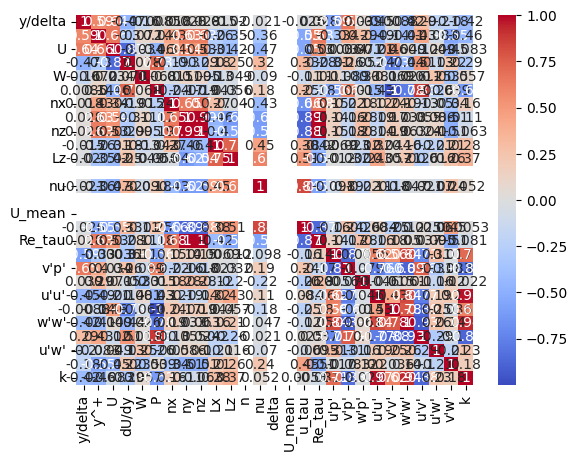

In [6]:
corr = df.corr()
%matplotlib inline
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
corr

In [7]:
#plot 3D graph k in function of principal components
%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['PC1'],
           df['PC2'], df['PC3'], c=df['k'], marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

ModuleNotFoundError: No module named 'ipympl'

In [8]:
#clustering kmeans
from sklearn.cluster import KMeans
%matplotlib inline
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

#plotting
plt.scatter(df['PC1'], df['PC2'],
            c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.show()

KeyError: 'PC1'

In [ ]:
df

,PC1,PC2,PC3,k
0,-3.557801,1.762774,0.719437,5.388763
1,-3.576342,1.700371,0.661952,5.355881
2,-3.592985,1.640637,0.607286,5.324218
3,-3.607874,1.583557,0.555410,5.293809
4,-3.621137,1.529093,0.506279,5.264666
...,...,...,...,...
1462,3.566715,0.343537,0.006432,0.723737
1463,3.627149,0.375429,-0.033803,0.713362
1464,3.684879,0.408855,-0.075636,0.705528
1465,3.739888,0.443840,-0.119073,0.700291


No such comm: 390c6afbac954f22bccbd56dbdfb8240


## Random forest regressor

In [ ]:
# Random Forest initialization for regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming df is your DataFrame and 'k' is your target variable
labels = df[["y/delta", "y^+", "Re_tau", "u_tau", "nu", "Lx", "Lz"]]
features = df[[
    "u'u'",
    "v'v'",
    "w'w'",
    "u'v'",
    "u'w'",
    "v'w'",
    "k",
    "U",
    "W",
    "P",
    "u'p'",
    "v'p'",
    "w'p'",
]]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
predictions = rf_regressor.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# If you want to see the model's R^2 score on the test set
r2_score = rf_regressor.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')

Mean Squared Error: 0.0013506851638144862
R^2 Score: 0.9990412794532774


## Pytorch NN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset

labels = df['k'].values
features = df.drop('k', axis=1).values

# Convert the NumPy arrays to PyTorch tensors
features_tensor = torch.tensor(features, dtype=torch.float32)
labels_tensor = torch.tensor(labels, dtype=torch.float32).view(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    features_tensor, labels_tensor, test_size=0.2, random_state=42)

# Create a DataLoader for the training and test sets
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


# define model architecture
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


# init model : define hyperparameters
input_size = features.shape[1]
hidden_size = 5  
output_size = 1

model = Net(input_size, hidden_size, output_size)

# lss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # back propagation for learining
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # print state
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Model Evaluation
model.eval()  # set model to evaluation mode
with torch.no_grad():
    predictions = model(X_test)
    mse = criterion(predictions, y_test)
    r2_score = 1 - mse / y_test.var()
    print(f'Test R^2 Score: {r2_score.item()}')
    print(f'Test MSE: {mse.item()}')


Epoch [10/100], Loss: 0.0152
Epoch [20/100], Loss: 0.0010
Epoch [30/100], Loss: 0.0015
Epoch [40/100], Loss: 0.0007
Epoch [50/100], Loss: 0.0006
Epoch [60/100], Loss: 0.0006
Epoch [70/100], Loss: 0.0008
Epoch [80/100], Loss: 0.0014
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0003
Test R^2 Score: 0.9996664524078369
Test MSE: 0.000471483072033152
